<a href="https://colab.research.google.com/github/shivaramanks/FinTechSpring2021_Kothandaraman_Sivaraman/blob/main/OLS_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mse_lasso_y_pred_alpha_1 : 1.0502651930037143
mse_lasso_y_pred_alpha_0.1 : 1.0495388552862484
mse_lasso_y_pred_alpha_0.01 : 1.031178809246584
mse_ridge_y_pred_alpha_1 : 1.0278380664949127
mse_ridge_y_pred_alpha_01 : 1.0278380661946538
mse_ridge_y_pred_alpha_001 : 1.0278380661916502
get_depth : 21
mse_tree_y_pred : 0.9717642829310343
mse_forest_y_pred : 0.9814122478456856


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mse_MLPR_y_pred : 0.8603545098815127


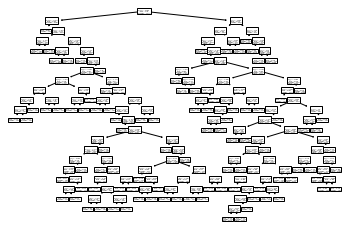

In [126]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC, Lasso, Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import  tree
from sklearn.neural_network import MLPRegressor
import math
from matplotlib import pyplot
import os


import statsmodels.api as sm



df =pd.DataFrame(pd.read_csv('/content/Stock Return Data.csv'))


df.insert(loc=1, column='Mkt_rf_lead', value=df['Mkt_rf'].shift(-1))
df.dropna(how='any')
#print(df['Agric'].describe())
#print(df.columns)

x= np.asarray( df.drop(columns=['Date','Mkt_rf','Mkt_rf_lead']))

#print(x.size)

y=  np.asarray(df.filter(['Mkt_rf_lead']).fillna(0))

#print(y.size)

nan_any = np.any(np.isnan(x)) | np.isnan(y)
#print(nan_any)
regression = LinearRegression()
regression.fit(x,y)

#print(regression)

y_pred = regression.predict(x)

mse_sk=mean_squared_error(y,y_pred)
mse=np.mean(np.square(np.subtract(y_pred,y)))
#print(mse)
#print(mse_sk)

rmse_sk =mean_squared_error(y,y_pred, squared=False)
rmse= np.sqrt(np.mean(np.square(np.subtract(y_pred,y))))

#print(rmse)
#print(rmse_sk)

#============================Lasso=Alpha= 1========================

lasso_regression_alpha_1 = linear_model.Lasso(alpha=1)
lasso_regression_alpha_1.fit(x,y)
lasso_y_pred_alpha_1 = lasso_regression_alpha_1.predict(x)

#print(lasso_y_pred_alpha_1)

mse_lasso_y_pred_alpha_1= mean_squared_error(y,lasso_y_pred_alpha_1)
print('mse_lasso_y_pred_alpha_1 :',mse_lasso_y_pred_alpha_1)

#==========================Lasso===Alpha= 0.1======================== 
lasso_regression_alpha_01 = linear_model.Lasso(alpha=0.1)
lasso_regression_alpha_01.fit(x,y)
lasso_y_pred_alpha_01 = lasso_regression_alpha_01.predict(x)


mse_lasso_y_pred_alpha_01= mean_squared_error(y,lasso_y_pred_alpha_01)
print('mse_lasso_y_pred_alpha_0.1 :',mse_lasso_y_pred_alpha_01)

#=========================Lasso===Alpha= 0.01======================== 
lasso_regression_alpha_001 = linear_model.Lasso(alpha=0.01)
lasso_regression_alpha_001.fit(x,y)
lasso_y_pred_alpha_001 = lasso_regression_alpha_001.predict(x)


mse_lasso_y_pred_alpha_001= mean_squared_error(y,lasso_y_pred_alpha_001)
print('mse_lasso_y_pred_alpha_0.01 :',mse_lasso_y_pred_alpha_001)

#=========================Ridge===Alpha =1======================== 
ridge_regression_alpha_1 = linear_model.Ridge(alpha=1)
ridge_regression_alpha_1.fit(x,y)
ridge_y_pred_alpha_1 = ridge_regression_alpha_1.predict(x)


mse_ridge_y_pred_alpha_1= mean_squared_error(y,ridge_y_pred_alpha_1)
print('mse_ridge_y_pred_alpha_1 :',mse_ridge_y_pred_alpha_1)

#=========================Ridge===Alpha =0.1======================== 
ridge_regression_alpha_01 = linear_model.Ridge(alpha=0.1)
ridge_regression_alpha_01.fit(x,y)
ridge_y_pred_alpha_01 = ridge_regression_alpha_01.predict(x)


mse_ridge_y_pred_alpha_01= mean_squared_error(y,ridge_y_pred_alpha_01)
print('mse_ridge_y_pred_alpha_01 :',mse_ridge_y_pred_alpha_01)

#=========================Ridge===Alpha =0.01======================== 
ridge_regression_alpha_001 = linear_model.Ridge(alpha=0.01)
ridge_regression_alpha_001.fit(x,y)
ridge_y_pred_alpha_001 = ridge_regression_alpha_001.predict(x)


mse_ridge_y_pred_alpha_001= mean_squared_error(y,ridge_y_pred_alpha_001)
print('mse_ridge_y_pred_alpha_001 :',mse_ridge_y_pred_alpha_001)

#==========================Decision Tree==============================
decisionTree =tree.DecisionTreeRegressor(random_state=42, min_samples_leaf=100)

decisionTree.fit(x,y)

y_pred_tree = decisionTree.predict(x)

mse_tree_y_pred = mean_squared_error(y,y_pred_tree)

tree.plot_tree(decisionTree)
print('get_depth :',decisionTree.get_depth())

print('mse_tree_y_pred :',mse_tree_y_pred)
#====================Random Forest===================================

forest = RandomForestRegressor( random_state=42, n_estimators=100,min_samples_leaf=100, max_features='sqrt')

forest.fit(x,y.ravel())

y_pred_forest = forest.predict(x)

mse_forest_y_pred = mean_squared_error(y,y_pred_forest)

print('mse_forest_y_pred :',mse_forest_y_pred)

#===============================Deep learning model=================

MLPR= MLPRegressor(random_state=42, solver='sgd',max_iter=10000, activation='relu',hidden_layer_sizes=(20,10,3));

MLPR.fit(x,y)

y_pred_mlpr= MLPR.predict(x)

mse_MLPR_y_pred = mean_squared_error(y,y_pred_mlpr)

print('mse_MLPR_y_pred :',mse_MLPR_y_pred)


